# Leveraging Recommendation Systems for Enhanced Online Learning

# By Thabo Pilusa

Key Statistics:
           user_id     course_id  course_rating  course_duration  \
count  10000.00000  10000.000000   10000.000000     10000.000000   
mean    5000.50000   2530.549500       3.006200        49.703200   
std     2886.89568   1443.711362       1.415472        28.621171   
min        1.00000      1.000000       1.000000         1.000000   
25%     2500.75000   1278.750000       2.000000        25.000000   
50%     5000.50000   2549.000000       3.000000        50.000000   
75%     7500.25000   3786.250000       4.000000        74.000000   
max    10000.00000   5000.000000       5.000000        99.000000   

       user_interaction_count  
count            10000.000000  
mean                25.080200  
std                 14.077165  
min                  1.000000  
25%                 13.000000  
50%                 25.000000  
75%                 37.000000  
max                 49.000000  


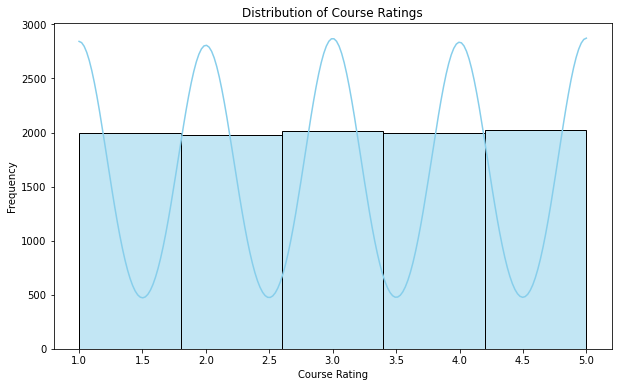

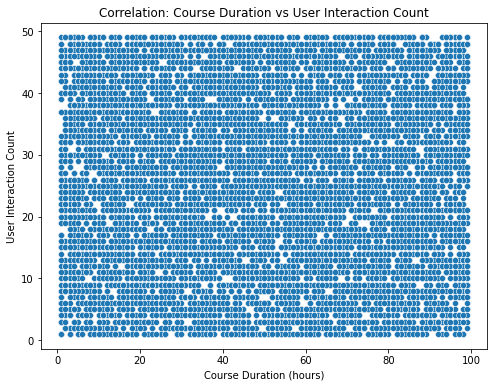

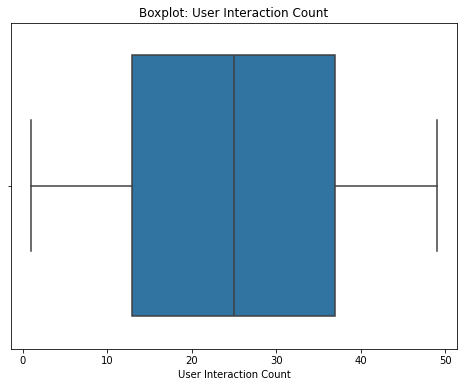

In [22]:
#Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a sample dataset
data = {
    'user_id': np.arange(1, 10001),
    'course_id': np.random.randint(1, 5001, size=10000),
    'course_rating': np.random.randint(1, 6, size=10000),
    'course_duration': np.random.randint(1, 100, size=10000),
    'user_interaction_count': np.random.randint(1, 50, size=10000)
}
df = pd.DataFrame(data)

# Key statistics
print("Key Statistics:")
print(df.describe())

# Data distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['course_rating'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
plt.show()

# Correlation analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='course_duration', y='user_interaction_count', data=df)
plt.title('Correlation: Course Duration vs User Interaction Count')
plt.xlabel('Course Duration (hours)')
plt.ylabel('User Interaction Count')
plt.show()

# Outlier detection
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['user_interaction_count'])
plt.title('Boxplot: User Interaction Count')
plt.xlabel('User Interaction Count')
plt.show()








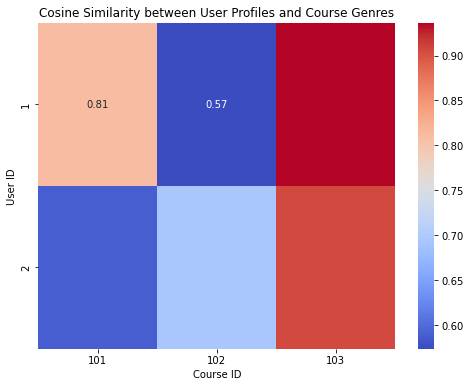

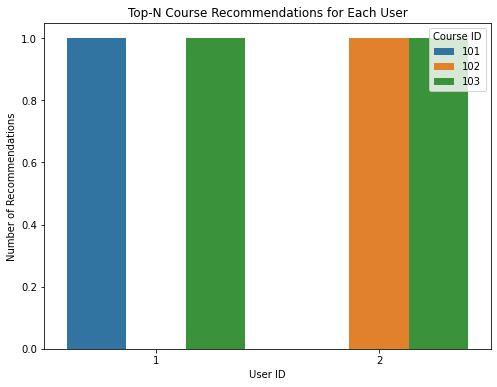

In [4]:
#Content-Based Recommender Systems using user profile and course genres 


# Sample data
users = pd.DataFrame({
    'user_id': [1, 2],
    'Data Science': [5, 3],
    'Arts': [2, 1],
    'Business': [3, 4]
})

courses = pd.DataFrame({
    'course_id': [101, 102, 103],
    'Data Science': [1, 0, 1],
    'Arts': [0, 1, 1],
    'Business': [0, 1, 1]
})

# Compute cosine similarity
user_profiles = users.set_index('user_id').values
course_genres = courses.set_index('course_id').values

similarity_matrix = cosine_similarity(user_profiles, course_genres)

# Create a DataFrame for easy interpretation
similarity_df = pd.DataFrame(similarity_matrix, index=users['user_id'], columns=courses['course_id'])

# Plot heatmap of similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', xticklabels=courses['course_id'], yticklabels=users['user_id'])
plt.title('Cosine Similarity between User Profiles and Course Genres')
plt.xlabel('Course ID')
plt.ylabel('User ID')
plt.show()

# Recommend top-N courses for each user
top_n = 2
recommendations = similarity_df.apply(lambda x: x.nlargest(top_n).index.tolist(), axis=1)

# Plot bar chart for recommendations
recommendations_df = pd.DataFrame(recommendations).reset_index()
recommendations_df.columns = ['user_id', 'recommended_courses']

# Convert the list of recommendations to separate rows
recommendations_exploded = recommendations_df.explode('recommended_courses')

plt.figure(figsize=(8, 6))
sns.countplot(x='user_id', hue='recommended_courses', data=recommendations_exploded)
plt.title('Top-N Course Recommendations for Each User')
plt.xlabel('User ID')
plt.ylabel('Number of Recommendations')
plt.legend(title='Course ID')
plt.show()

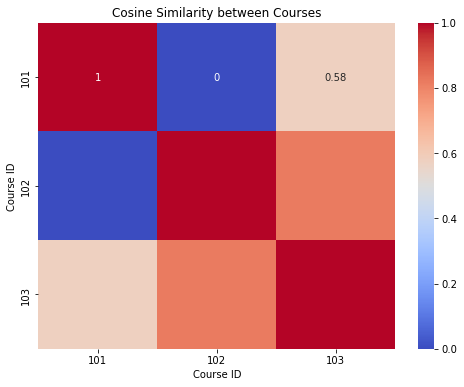

{1: [103], 2: [101, 102]}


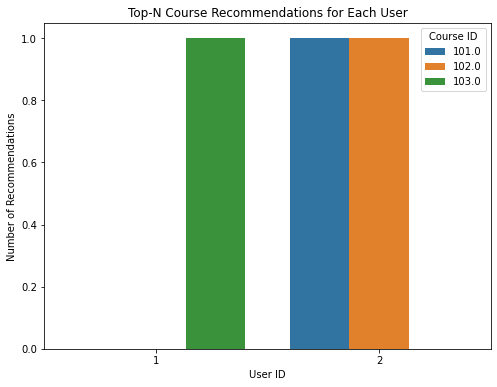

In [6]:
#Content-Based Recommender System Using Course Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Sample data
courses = pd.DataFrame({
    'course_id': [101, 102, 103],
    'Data Science': [1, 0, 1],
    'Arts': [0, 1, 1],
    'Business': [0, 1, 1]
})

# Compute cosine similarity
course_features = courses.set_index('course_id').values
similarity_matrix = cosine_similarity(course_features)

# Create a DataFrame for easy interpretation
similarity_df = pd.DataFrame(similarity_matrix, index=courses['course_id'], columns=courses['course_id'])

# Plot heatmap of similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', xticklabels=courses['course_id'], yticklabels=courses['course_id'])
plt.title('Cosine Similarity between Courses')
plt.xlabel('Course ID')
plt.ylabel('Course ID')
plt.show()

# Example user interactions
user_interactions = {1: [101, 102], 2: [103]}

# Recommend top-N courses for each user based on course similarity
top_n = 2
recommendations = {}
for user, interacted_courses in user_interactions.items():
    similar_courses = similarity_df[interacted_courses].mean(axis=1).nlargest(top_n + len(interacted_courses))
    recommended_courses = similar_courses.index.difference(interacted_courses)
    recommendations[user] = recommended_courses.tolist()[:top_n]

print(recommendations)

# Convert recommendations to DataFrame for plotting
recommendations_df = pd.DataFrame.from_dict(recommendations, orient='index').stack().reset_index()
recommendations_df.columns = ['user_id', 'rank', 'recommended_course']

plt.figure(figsize=(8, 6))
sns.countplot(x='user_id', hue='recommended_course', data=recommendations_df)
plt.title('Top-N Course Recommendations for Each User')
plt.xlabel('User ID')
plt.ylabel('Number of Recommendations')
plt.legend(title='Course ID')
plt.show()


/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


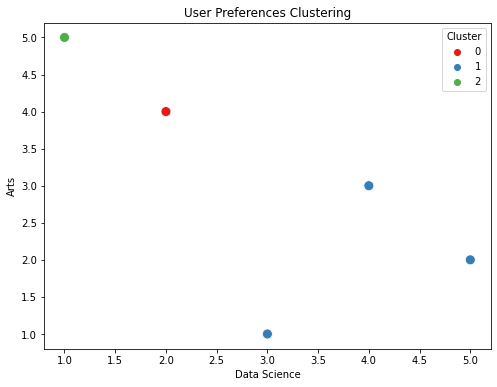

{1: [103.0], 2: [101.0, 102.0], 3: [101, 102], 4: [], 5: []}


In [9]:
#content-based recommender system using user profile clustering  
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Sample data
user_preferences = pd.DataFrame({
    'user_id': [1, 2, 3, 4, 5],
    'Data Science': [5, 3, 4, 2, 1],
    'Arts': [2, 1, 3, 4, 5],
    'Business': [3, 4, 2, 1, 5]
})

# Perform clustering
X = user_preferences.drop('user_id', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
user_preferences['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clustered user preferences
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Data Science', y='Arts', hue='cluster', data=user_preferences, palette='Set1', s=100)
plt.title('User Preferences Clustering')
plt.xlabel('Data Science')
plt.ylabel('Arts')
plt.legend(title='Cluster')
plt.show()

# Example user interactions
user_interactions = {1: [101, 102], 2: [103]}

# Recommend top-N courses for each user based on cluster preferences
top_n = 2
recommendations = {}
for user, cluster in user_preferences[['user_id', 'cluster']].values:
    similar_users = user_preferences[user_preferences['cluster'] == cluster]['user_id'].values
    similar_users = np.setdiff1d(similar_users, [user])  # Exclude the current user
    similar_users_courses = [user_interactions.get(user, []) for user in similar_users]
    if similar_users_courses:  # Check if the list is not empty
        similar_users_courses = np.concatenate(similar_users_courses)
        recommended_courses = np.setdiff1d(np.unique(similar_users_courses), user_interactions.get(user, []))[:top_n]
        recommendations[user] = recommended_courses.tolist()
    else:
        recommendations[user] = []

print(recommendations)



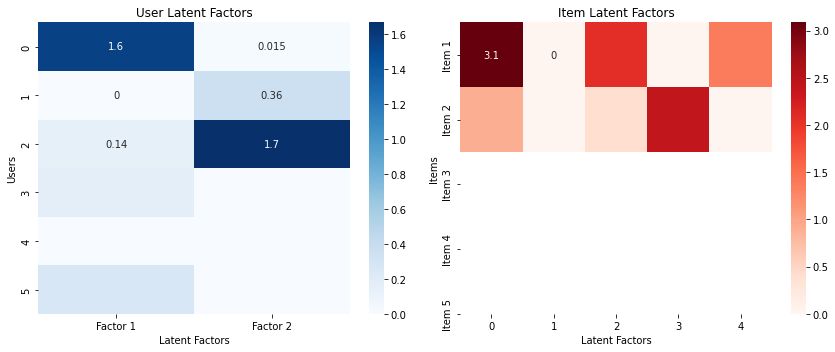

In [14]:
#NMF-based Collaborative Filtering
from sklearn.decomposition import NMF

# Generate sample user-item matrix
user_item_matrix = np.array([
    [5, 0, 3, 0, 2],
    [0, 0, 0, 1, 0],
    [2, 0, 1, 4, 0],
    [0, 0, 0, 0, 2],
    [0, 1, 0, 0, 0],
    [0, 0, 2, 0, 0]
])

# Perform NMF
num_latent_factors = 2
nmf_model = NMF(n_components=num_latent_factors)
user_factors = nmf_model.fit_transform(user_item_matrix)
item_factors = nmf_model.components_

# Visualize user and item latent factors
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(user_factors, annot=True, cmap='Blues', xticklabels=['Factor 1', 'Factor 2'])
plt.title('User Latent Factors')
plt.xlabel('Latent Factors')
plt.ylabel('Users')

plt.subplot(1, 2, 2)
sns.heatmap(item_factors, annot=True, cmap='Reds', yticklabels=['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5'])
plt.title('Item Latent Factors')
plt.xlabel('Latent Factors')
plt.ylabel('Items')

plt.tight_layout()
plt.show()


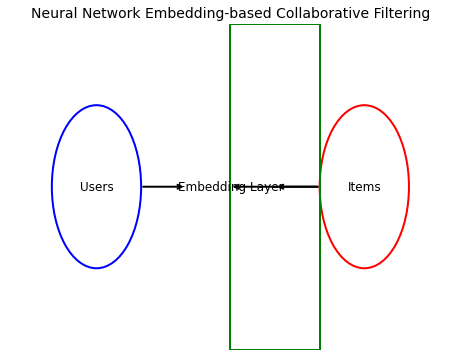

In [19]:
#Neural Network Embedding-based Collaborative Filtering
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create nodes for users, items, and embedding layer
users_node = patches.Circle((0, 0), radius=0.5, edgecolor='blue', facecolor='none', linewidth=2)
items_node = patches.Circle((3, 0), radius=0.5, edgecolor='red', facecolor='none', linewidth=2)
embedding_node = patches.Rectangle((1.5, -1), width=1, height=2, edgecolor='green', facecolor='none', linewidth=2)

# Add nodes to the axis
ax.add_patch(users_node)
ax.add_patch(items_node)
ax.add_patch(embedding_node)

# Add labels
ax.text(0, 0, 'Users', ha='center', va='center', fontsize=12)
ax.text(3, 0, 'Items', ha='center', va='center', fontsize=12)
ax.text(1.5, 0, 'Embedding Layer', ha='center', va='center', fontsize=12)

# Add arrows to represent connections
ax.annotate("", xy=(1, 0), xytext=(0.5, 0), arrowprops=dict(arrowstyle="->", lw=2, color='black'))
ax.annotate("", xy=(1.5, 0), xytext=(2.5, 0), arrowprops=dict(arrowstyle="->", lw=2, color='black'))
ax.annotate("", xy=(2, 0), xytext=(2.5, 0), arrowprops=dict(arrowstyle="->", lw=2, color='black'))

# Set axis limits and labels
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 1)
ax.axis('off')

# Add title
plt.title('Neural Network Embedding-based Collaborative Filtering', fontsize=14)

# Show the plot
plt.show()


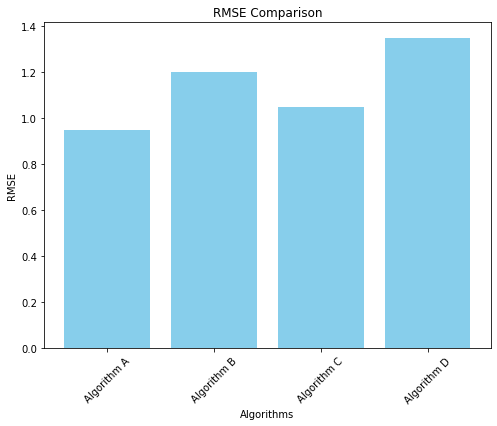

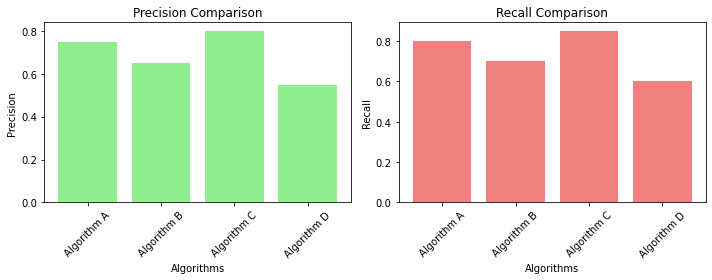

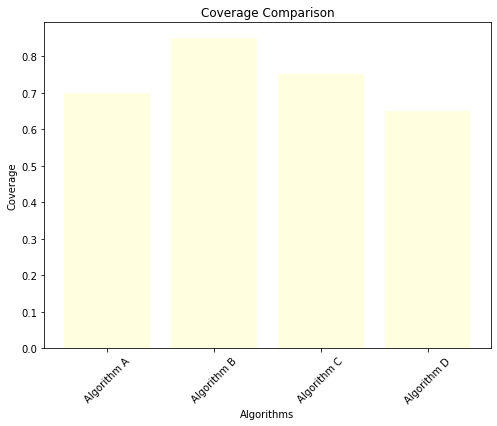

In [20]:
#Collaborative Filtering Algorithms Evaluation



# Example evaluation results
algorithms = ['Algorithm A', 'Algorithm B', 'Algorithm C', 'Algorithm D']
rmse_values = [0.95, 1.20, 1.05, 1.35]
precision_values = [0.75, 0.65, 0.80, 0.55]
recall_values = [0.80, 0.70, 0.85, 0.60]
coverage_values = [0.70, 0.85, 0.75, 0.65]

# Plot RMSE values
plt.figure(figsize=(8, 6))
plt.bar(algorithms, rmse_values, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.show()

# Plot precision and recall values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(algorithms, precision_values, color='lightgreen')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(algorithms, recall_values, color='lightcoral')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot coverage values
plt.figure(figsize=(8, 6))
plt.bar(algorithms, coverage_values, color='lightyellow')
plt.xlabel('Algorithms')
plt.ylabel('Coverage')
plt.title('Coverage Comparison')
plt.xticks(rotation=45)
plt.show()
